<a href="https://colab.research.google.com/github/Anish-S-tech/my-ml-journey/blob/main/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This file shows about the implementation of Gaussian Naive Bayes for continuous features using scikit learn and iris dataset

In [ ]:
# step 1: Importing libraries

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 2: Loading dataset and processing it

iris = load_iris()

X = iris.data
y = iris.target

In [ ]:
# Step 3: Encoding and splitting the dataset

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Step 4: Creating and training the model

gnb = GaussianNB()

gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Step 6: Making predictions and model evaluation

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


In [ ]:
# Step 7: Plotting 1D gaussian distributions for all features

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_distributions(X, y, gnb, feature_names, target_names):
    num_features = len(feature_names)
    num_classes = len(np.unique(y))
    X_np = X

    fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features))

    for feature_index in range(num_features):
        feature_name = feature_names[feature_index]
        x_vals = np.linspace(X_np[:, feature_index].min(),
                             X_np[:, feature_index].max(), 200)

        ax = axes[feature_index]

        for cls in range(num_classes):
            mean = gnb.theta_[cls, feature_index]
            std = np.sqrt(gnb.var_[cls, feature_index])
            y_vals = norm.pdf(x_vals, mean, std)
            ax.plot(x_vals, y_vals, label=f"{target_names[cls]}")

        ax.set_title(f"Gaussian Distribution - {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Probability Density")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

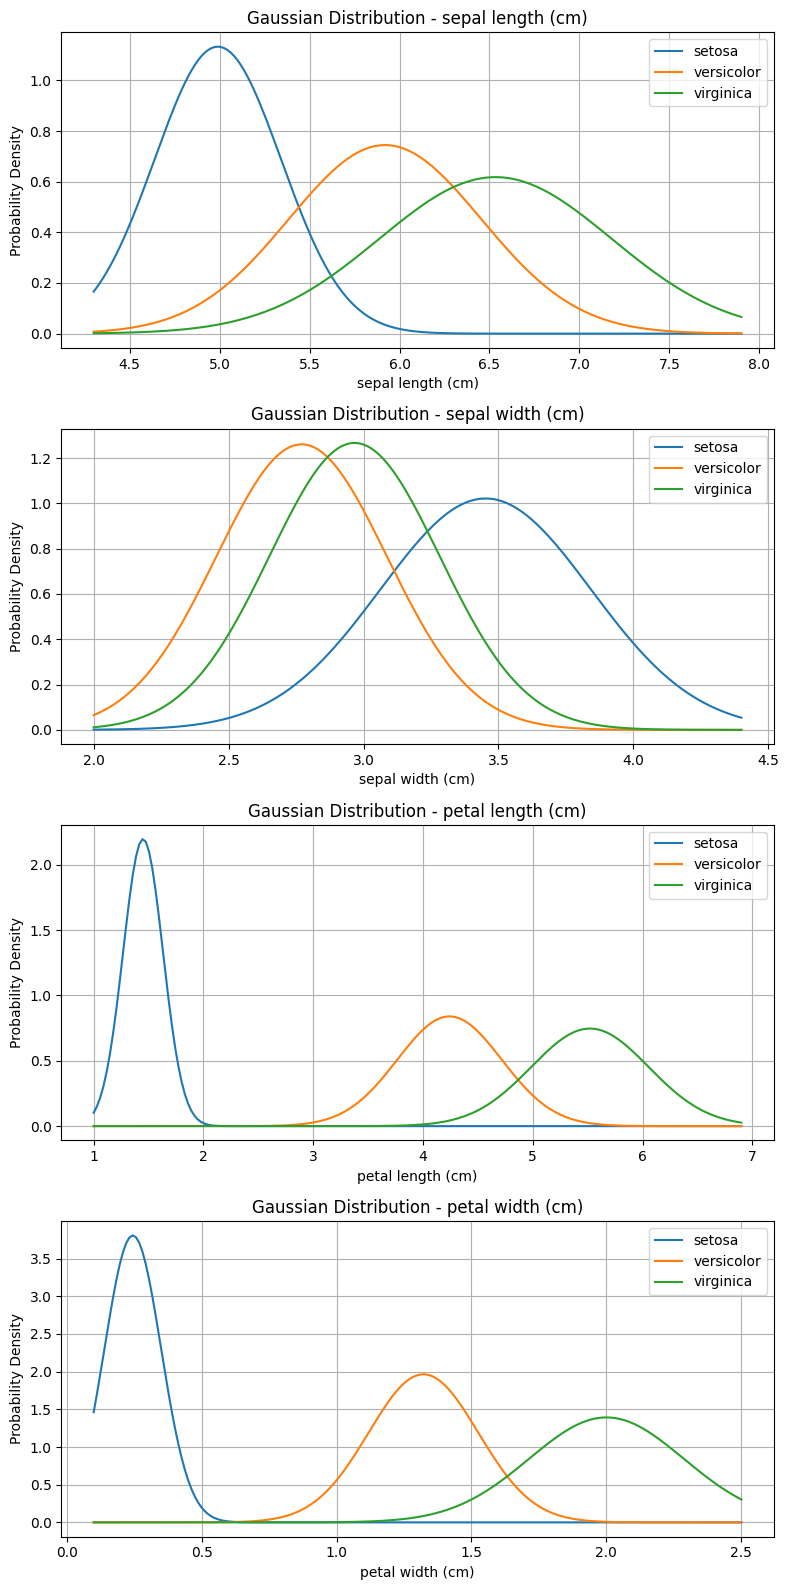

In [ ]:
target_names = iris.target_names
plot_gaussian_distributions(X, y, gnb, iris.feature_names, target_names)